<a href="https://colab.research.google.com/github/thedataninja1786/Data-Science/blob/main/KMEANS_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.datasets import make_blobs 
import numpy as np 
import random 
import matplotlib.pyplot as plt

In [3]:
class KMeansClustering():
  def __init__(self, n_clusters, X, n_iters):
    self.n_clusters = n_clusters
    self.X = X
    self.n_iters = n_iters

  def fit(self):
    # Initialize random centroids by selecting random values from the dataset
    # Shape will be: (n_features x n_clusters)
    centroids = [self.X[random.randrange(0,len(self.X))] for cluster in range(self.n_clusters)]

    # Perform 100 simulations until convergence 
    for _ in range(self.n_iters):
      # Initialize n amount of clusters which datapoints will be appended 
      clusters = [[] for x in range(self.n_clusters)]

      for idx, data_point in enumerate(self.X): 
        prospective_centroids = []
        for centroid in centroids:
          x = 0 
          for dt,ct in zip(data_point,centroid):
            # Calculate the Euclidean distance 
            x += (dt - ct) ** 2 
          x = x ** 0.5 
          prospective_centroids.append(x)
        # Index the closest centroid 
        closest_centroid_idx = prospective_centroids.index(min(prospective_centroids))
        # Append each datapoint to its respective cluster  
        clusters[closest_centroid_idx].append(idx)

      # Update centroids with the mean of each previously classified cluster
      # mean is calculated on feature-level 
      new_centroids = [[self.X[i] for i in cluster] for cluster in clusters]
      for i,_ in enumerate(centroids):
        centroids[i] = np.mean(new_centroids[i], axis=0)
    
    return (clusters, centroids)

  def predict(self):
    clusters, centroids = self.fit()
    predictions = []
    for i,cluster in enumerate(clusters):
      for _ in cluster:
        predictions.append(i)
        
    return (predictions, centroids)


In [24]:
# Create dummy data 
random.seed(0)
X, _ = make_blobs(n_samples = 1000, n_features= 2,random_state=45)
X = X.tolist()

k_means = KMeansClustering(n_clusters = 3, X = X, n_iters = 100)
predictions, centroids = k_means.predict()

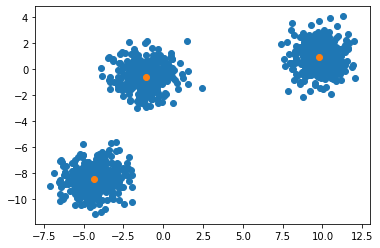

In [25]:
import pandas as pd
centroids = pd.DataFrame(centroids)
df = pd.DataFrame(X)
df['predictions'] = predictions

plt.scatter(df[0], df[1])
plt.scatter(centroids[0], centroids[1])
plt.show()